** MAS Data Science and Engineering – DSE 220 **

The IRI data is set available on the AWS instance.  Several additional documents describing the data set and pointing to additional Bibliography are made available (including the white paper: Bronnenberg, Bart J., Kruger, Michael W, and Mela, Carl F. The IRI Marketing Dataset.).  Getting to know this data set is time well spent as it will be very applicable towards the Final project.  The data set is of medium size and complexity – however understanding the data and how file/folders/datasets related to each other will be of crucial importance for creating an appropriate training data set. 

The data set has been purchase by UCSD, it is only for internal use and comes with restrictions.  Please read and follow the NDA specified at the very end of the “IRI_database_technical_appendix” document provided with the data set.  


** Assignment #4**<br> 
** 1. Problem #1  (Can be submitted individually or as part of the Final project team)**

Using any one or several clustering techniques we have covered in class – determine the groups of “similar” panelist.  You will choose what set of attributes to use for determining similarity-explain why you chose them.  Provide the evaluation and validation of the produced model(s).  Describe in details how you prepared the data, created the training data set, designed features and trained the model (what options, parameters, number of clusters, types of clustering techniques(s) used, etc.)


In [1]:
# Get Beer DataSet

In [2]:
!s3cmd --version

s3cmd version 1.5.2


In [3]:
!ls -latr

total 3888
-rw-r-----  1 abhijeet abhijeet 3885056 May 29 14:17 Duke+Beer+Report.xls
drwxrwxr-x  2 abhijeet abhijeet    4096 May 31 11:21 Year2
drwxrwxr-x  2 abhijeet abhijeet    4096 May 31 11:25 Year3
drwxrwxr-x  2 abhijeet abhijeet    4096 May 31 11:29 Year4
drwxrwxr-x  2 abhijeet abhijeet    4096 May 31 11:35 Year7
drwxrwxr-x  2 abhijeet abhijeet    4096 May 31 11:36 Year8
drwxrwxr-x 15 abhijeet abhijeet    4096 May 31 14:30 ..
drwxrwxr-x  2 abhijeet abhijeet    4096 Jun  1 19:20 Year1
drwxrwxr-x  2 abhijeet abhijeet    4096 Jun  1 19:36 Year5
drwxrwxr-x  2 abhijeet abhijeet    4096 Jun  1 21:52 Year6
drwxrwxr-x  2 abhijeet abhijeet    4096 Jun  3 23:42 demos trips external 1_11 may13
drwxr-xr-x  2 abhijeet abhijeet    4096 Jun  3 23:52 .ipynb_checkpoints
-rw-rw-r--  1 abhijeet abhijeet   39648 Jun 11 15:34 FinalAssignment_Abhijeet_contribution_v1.ipynb
drwxrwxr-x 12 abhijeet abhijeet    4096 Jun 11 15:34 .


In [4]:
!pwd

/home/abhijeet/Documents/DSE/asgulati/DSE-220/FinalData


In [5]:
#cd Year$y; s3cmd get --recursive s3://dse-iri-dataset/Year$y/External/beer/; cd ..

In [6]:
#import os

#for y in range(2):
#    dest = 'year'+ str(y)
#    #print dest
#    if not os.path.isdir(dest):
#        os.mkdir(dest)
#        print('Directory created at: ' + dest)
#        os.chdir(dest)
#        !pwd
        

In [7]:
%cd /home/abhijeet/Documents/DSE/asgulati/DSE-220/FinalData/demos trips external 1_11 may13

/home/abhijeet/Documents/DSE/asgulati/DSE-220/FinalData/demos trips external 1_11 may13


In [8]:
!pwd

/home/abhijeet/Documents/DSE/asgulati/DSE-220/FinalData/demos trips external 1_11 may13


In [9]:
#copy ads_demo*.CSV to ads_demo*.csv

In [10]:
!ls -ltra ads*

-rw-rw-r-- 1 abhijeet abhijeet 921481 May 28 19:52 ads demo1.csv
-rw-rw-r-- 1 abhijeet abhijeet 605693 May 28 19:52 ads demo3.csv
-rw-rw-r-- 1 abhijeet abhijeet 915388 May 28 19:52 ads demo2.csv
-rw-rw-r-- 1 abhijeet abhijeet 465052 May 28 19:52 ads demo7.csv
-rw-rw-r-- 1 abhijeet abhijeet 513382 May 28 19:52 ads demo6.CSV
-rw-rw-r-- 1 abhijeet abhijeet 530027 May 28 19:52 ads demo5.csv
-rw-rw-r-- 1 abhijeet abhijeet 545373 May 28 19:52 ads demo4.csv
-rw-rw-r-- 1 abhijeet abhijeet 433258 May 28 19:52 ads demos9.CSV
-rw-rw-r-- 1 abhijeet abhijeet 392681 May 28 19:52 ads demos11.CSV
-rw-rw-r-- 1 abhijeet abhijeet 400628 May 28 19:52 ads demos10.CSV
-rw-rw-r-- 1 abhijeet abhijeet 457379 May 28 19:52 ads demo8.CSV
-rw-rw-r-- 1 abhijeet abhijeet 513382 Jun  3 23:38 ads demo6.csv
-rw-rw-r-- 1 abhijeet abhijeet 433258 Jun  3 23:39 ads demo9.csv
-rw-rw-r-- 1 abhijeet abhijeet 400628 Jun  3 23:39 ads demo10.csv
-rw-rw-r-- 1 abhijeet abhijeet 392681 Jun  3 23:40 ads demo11.csv
-rw-rw-r-- 1 abhij

In [11]:
import numpy as np
import pandas as pd

**Read ads_demo Data**

In [12]:
#!pwd
path = 'ads demo{0}.csv'

def import_ads_demo_data():
    with open(path.format('1'),'r') as file_in:
        #print file_in
        cols = file_in.readline().split(',')
        #print cols
    my_df = pd.read_csv(path.format('1'), skiprows=1, header=None, index_col=None)
    #print my_df.head(10) 
    for i in range(1,11): # No of ads_demos csv files 
        df1 = pd.read_csv(path.format(str(i)), skiprows=1, header=None, index_col=None)
        my_df = pd.concat([my_df, df1], axis=0)    
    my_df.columns = cols 
    return (cols, my_df)

In [13]:
column_headers, df = import_ads_demo_data()

In [14]:
print len(df)
print df.head(5)

84404
   Panelist ID  Panelist Type Combined Pre-Tax Income of HH  Family Size  \
0      1100016              6                             3            3   
1      1100032              0                             5            2   
2      1100057              0                             8            2   
3      1100156              6                             7            2   
4      1100164              0                            10            2   

  HH_RACE  Type of Residential Possession COUNTY HH_AGE HH_EDU HH_OCC  \
0       1                               2    NaN    NaN    NaN    NaN   
1       1                               2    NaN    NaN    NaN    NaN   
2       1                               2    NaN    NaN    NaN    NaN   
3       1                               2    NaN    NaN    NaN    NaN   
4       1                               2    NaN    NaN    NaN    NaN   

      ...       HISP_FLAG  HISP_CAT  HH Head Race (RACE2)  \
0     ...             NaN       NaN  

In [15]:
print column_headers

['Panelist ID', 'Panelist Type', 'Combined Pre-Tax Income of HH', 'Family Size', 'HH_RACE', 'Type of Residential Possession', 'COUNTY', 'HH_AGE', 'HH_EDU', 'HH_OCC', 'Age Group Applied to Male HH', 'Education Level Reached by Male HH', 'Occupation Code of Male HH', 'Male Working Hour Code', 'MALE_SMOKE', 'Age Group Applied to Female HH', 'Education Level Reached by Female HH', 'Occupation Code of Female HH', 'Female Working Hour Code', 'FEM_SMOKE', 'Number of Dogs', 'Number of Cats', 'Children Group Code', 'Marital Status', 'Language', 'Number of TVs Used by HH', 'Number of TVs Hooked to Cable', 'Year', 'HISP_FLAG', 'HISP_CAT', 'HH Head Race (RACE2)', 'HH Head Race (RACE3)', 'Microwave Owned by HH', 'ZIPCODE', 'FIPSCODE', 'market based upon zipcode', 'IRI Geography Number', 'EXT_FACT\r\n']


In [16]:
def describe_each_cols(df):
    for i in range(len(df.columns)):
        col_name = df.columns[i]
        col = df[col_name]
        print '\n\n' + col_name + '\n' + '-'*len(col_name) + '\n', col.describe()

In [17]:
describe_each_cols(df)



Panelist ID
-----------
count      84404.000000
mean     2357037.636652
std      1037706.440411
min      1100016.000000
25%      1198432.000000
50%      3117077.000000
75%      3181398.000000
max      4266791.000000
Name: Panelist ID, dtype: float64


Panelist Type
-------------
count    84404.000000
mean         2.684186
std          2.929835
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max          9.000000
Name: Panelist Type, dtype: float64


Combined Pre-Tax Income of HH
-----------------------------
count     84404
unique       27
top           6
freq      10169
Name: Combined Pre-Tax Income of HH, dtype: int64


Family Size
-----------
count    84404.000000
mean         2.400384
std          1.269094
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: Family Size, dtype: float64


HH_RACE
-------
count     84404
unique       10
top           1
freq      51377
Name: HH_RAC

In [18]:
Feature_eng_df = df.copy()

cols_drop = ['EXT_FACT\r\n','MALE_SMOKE','FEM_SMOKE','HISP_FLAG','HISP_CAT','HH Head Race (RACE2)',
             'HH Head Race (RACE3)','Microwave Owned by HH','FIPSCODE', 'market based upon zipcode']
clean_df = Feature_eng_df.drop(cols_drop, axis=1)

In [19]:
clean_df.describe()

,Panelist ID,Panelist Type,Family Size,Type of Residential Possession,Age Group Applied to Male HH,Education Level Reached by Male HH,Occupation Code of Male HH,Male Working Hour Code,Age Group Applied to Female HH,Education Level Reached by Female HH,Occupation Code of Female HH,Female Working Hour Code,Number of Dogs,Number of Cats,Children Group Code,Marital Status,ZIPCODE,IRI Geography Number
count,84404.000000,84404.000000,84404.000000,84404.000000,84404.000000,84404.000000,84404.000000,84404.000000,84404.000000,84404.000000,84404.000000,84404.000000,84404.000000,84404.000000,84404.000000,84404.000000,42551.000000,42551.000000
mean,2357037.636652,2.684186,2.400384,1.629117,5.046870,5.746825,7.685169,3.727264,4.443723,5.313338,7.143074,3.146877,0.332733,0.375361,6.916213,2.152481,28778.452680,2.030716
std,1037706.440411,2.929835,1.269094,0.489791,1.815314,5.177865,8.647971,4.901452,1.629416,5.948272,10.692185,6.134982,0.639315,0.788874,2.119029,2.451737,26737.530058,0.999540
min,1100016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1201.000000,1.000000
25%,1198432.000000,0.000000,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,3.000000,4.000000,1.000000,2.000000,0.000000,0.000000,8.000000,1.000000,1201.000000,1.000000
50%,3117077.000000,0.000000,2.000000,2.000000,5.000000,6.000000,9.000000,3.000000,5.000000,5.000000,7.000000,3.000000,0.000000,0.000000,8.000000,2.000000,54701.000000,3.000000
75%,3181398.000000,6.000000,3.000000,2.000000,7.000000,9.000000,11.000000,5.000000,6.000000,6.000000,10.000000,4.000000,1.000000,0.000000,8.000000,2.000000,54703.000000,3.000000
max,4266791.000000,9.000000,8.000000,3.000000,7.000000,99.000000,99.000000,99.000000,7.000000,99.000000,99.000000,99.000000,5.000000,5.000000,8.000000,99.000000,54772.000000,3.000000


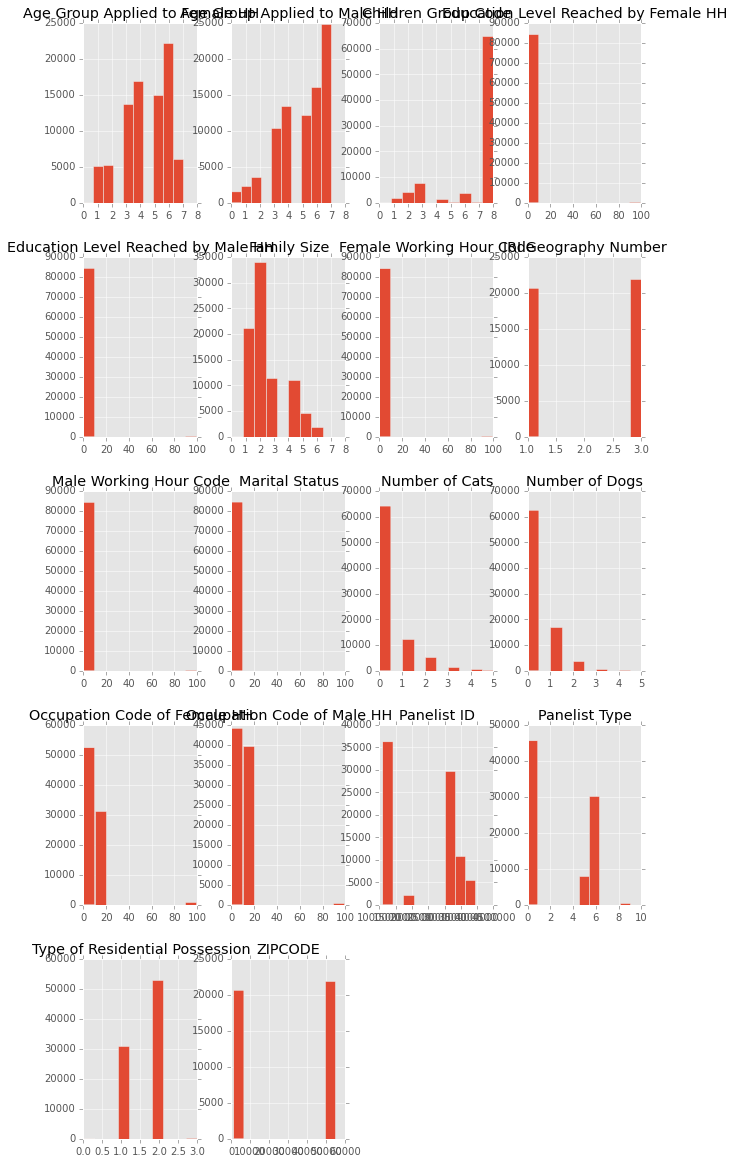

In [27]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

clean_df[clean_df.columns].hist(figsize=(10,20));